# XGBoost
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

* XGBoost stands for Extreme Gradient Boosted trees. I is amazing and has great reputation in winning kaggle competions, it fast, easy to use and a good choice of algorithm to use.

# Features of XGBoost
* Regularized boosting (prevent overfitting)
* Can handle missing values automatically
* Parallel processing (Parallel processing is a method of simultaneously breaking up and running program tasks on multiple microprocessors, thereby reducing processing time.) 

* Can cross-validate at each iteration i.e OT Enables early stopping, finding optimal number of iterations

* Incremental training

* Can plug in your own optimization objectives

* Tree pruning i.e generally results in deeper, but optimized, trees

***To Install use pip install xgboost***

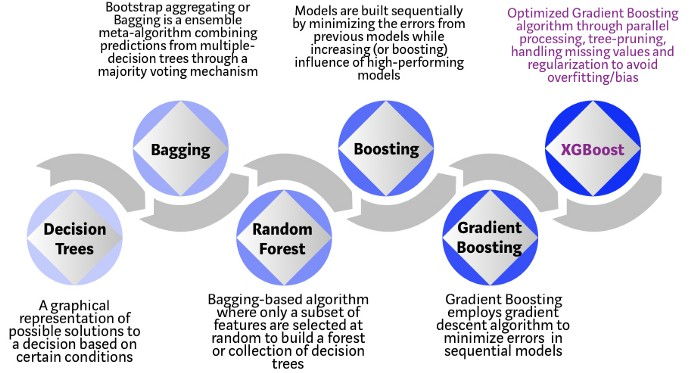

# Important Hyperparameters

* Booster (gbtree or gblinear)
* objective (i.e multi:softmadx, multi:softprob)
* Eta (learning rate-adjust weights on each step)
* Max_depth (depth of the tree)
* Min_child_weight: can control overfitting, but too high will underfit etc

# illustraing with the Iris data set

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

np.set_printoptions(precision = 3)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [3]:
!pip install xgboost

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0, stratify=iris.target)

In [9]:
#model
import xgboost as xgb
# we need to use a Dmatrix in xgboost

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [38]:
# setting our hyperparameters
param = {'max_depth': 4,
        'eta': 0.3, #learning_rate
        'objective': 'multi:softmax',
        'num_class': 3 #we have three features to choose from
        }
epochs = 10

In [39]:
xgb_model =xgb.train(param, train, epochs)

In [40]:
prediction = xgb_model.predict(test)
print(prediction)

[0. 1. 0. 1. 0. 1. 2. 0. 0. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 0. 0. 2. 2. 1.
 0. 1. 1. 2. 0. 0.]


# Accuracy

In [42]:
print('At 0.3 learning rate and other parameters i will get:')
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

At 0.3 learning rate and other parameters i will get:


0.9333333333333333

But if i tune the parameters further i may get better predictions say ***eta = 0.03 i.e our learning rate***

In [44]:
# setting our hyperparameters
param = {'max_depth': 4,
        'eta': 0.03, #learning_rate
        'objective': 'multi:softmax',
        'num_class': 3 #we have three features to choose from
        }
epochs = 10

xgb_model =xgb.train(param, train, epochs)
prediction = xgb_model.predict(test)
print('Now At 0.3 learning rate we get:')
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

Now At 0.3 learning rate we get:


1.0

# Wow this is really awesome!